# Customer Churn Analysis
This is a dataset of an ecommerce company and we have some customers who are churning (leaving).

## Goals
1. Perform exploratory analysis of the provided customer data to share insights of the behavior and characteristics of the customers. Make suggestions to help the company with customer retention

2. Build a predictive model to identify customers who are at risk of leaving the company (churn) based on the provided variables. This can help the company take proactive steps to retain these customers and reduce the rate of churn

## Data description
1. CustomerID

2. Churn: Churn Flag

3. Tenure: in months

4. PreferredLoginDevice

5. CityTier

6. WarehouseToHome: Distance in between warehouse to home of customer

7. PreferredPaymentMode

8. Gender

9. HourSpendOnApp

10. NumberOfDeviceRegistered

11. PreferedOrderCat

12. SatisfactionScore

13. MaritalStatus

14. NumberOfAddress

15. OrderAmountHikeFromlastYear: Percentage increases in order from last year

16. CouponUsed: Total number of coupon has been used in last month

17. OrderCount: Total number of orders has been places in last month

18. DaySinceLastOrder

19. CashbackAmount: Average cashback in last month

20. Complain: Complain flag - if the customer ever had a complain

## Tips
1. Sharing your thoughts and reasoning as you go will help!
2. Feel free to use any libraries like scikit-learn, use stackoverflow. Don't use ChatGPT and similar.
3. If you are unable to complete any step I can provide help towards the answer. Demonstrating understanding of the solution and result will earn some points!

## Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data overview

#### Question: Read the sheet named 'E Comm' from file 'E Commerce Dataset.xlsx' saved in current directory into df variable. Print first 5 rows of the dataframe

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Question: How many unique values are in each column?

In [5]:
for columns in df:
  print(columns,df[columns].nunique())

CustomerID 5630
Churn 2
Tenure 36
PreferredLoginDevice 3
CityTier 3
WarehouseToHome 34
PreferredPaymentMode 7
Gender 2
HourSpendOnApp 6
NumberOfDeviceRegistered 6
PreferedOrderCat 6
SatisfactionScore 5
MaritalStatus 3
NumberOfAddress 15
Complain 2
OrderAmountHikeFromlastYear 16
CouponUsed 17
OrderCount 16
DaySinceLastOrder 22
CashbackAmount 2586


#### Question: Calculate average churn rate
Note: Churn = 1 means customer has churned

In [6]:
df[df['Churn'] == 1].count()

CustomerID                     948
Churn                          948
Tenure                         867
PreferredLoginDevice           948
CityTier                       948
WarehouseToHome                864
PreferredPaymentMode           948
Gender                         948
HourSpendOnApp                 890
NumberOfDeviceRegistered       948
PreferedOrderCat               948
SatisfactionScore              948
MaritalStatus                  948
NumberOfAddress                948
Complain                       948
OrderAmountHikeFromlastYear    934
CouponUsed                     940
OrderCount                     930
DaySinceLastOrder              894
CashbackAmount                 948
dtype: int64

In [7]:
#check if there is any n/a
df['Churn'].isna().nunique()

1

In [8]:
#churn rate
df[df['Churn'] == 1].shape[0]/df.shape[0]*100

16.838365896980463

#### Question: How many missing values / nulls are there in each column?

In [9]:
for col in df.columns:
  print(col, df[col].isna().sum())

CustomerID 0
Churn 0
Tenure 264
PreferredLoginDevice 0
CityTier 0
WarehouseToHome 251
PreferredPaymentMode 0
Gender 0
HourSpendOnApp 255
NumberOfDeviceRegistered 0
PreferedOrderCat 0
SatisfactionScore 0
MaritalStatus 0
NumberOfAddress 0
Complain 0
OrderAmountHikeFromlastYear 265
CouponUsed 256
OrderCount 258
DaySinceLastOrder 307
CashbackAmount 0


# 2. Exploratory Data Analysis

## Univariate analysis
Here we will understand select variables

### 1. Numeric variables

#### Question: Histogram
Show histograms for all numeric columns. Describe the each variable's distribution briefly to a business stakeholder

In [10]:
numerical_df = df[['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain', 'OrderAmountHikeFromlastYear',	'CouponUsed',	'OrderCount',	'DaySinceLastOrder',	'CashbackAmount']]
numerical_df.head(5)

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       50001      1     4.0         3              6.0             3.0   
1       50002      1     NaN         1              8.0             3.0   
2       50003      1     NaN         1             30.0             2.0   
3       50004      1     0.0         3             15.0             2.0   
4       50005      1     0.0         1             12.0             NaN   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  
0          159.93  
1          120.90  
2          120.28  
3          134.07  
4          129.60

In [11]:
categorical_df = df[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']]
categorical_df.head(5)

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0         Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                Phone                  UPI    Male              Mobile   
2                Phone           Debit Card    Male              Mobile   
3                Phone           Debit Card    Male  Laptop & Accessory   
4                Phone                   CC    Male              Mobile   

  MaritalStatus  
0        Single  
1        Single  
2        Single  
3        Single  
4        Single

<AxesSubplot:xlabel='CityTier', ylabel='Count'>

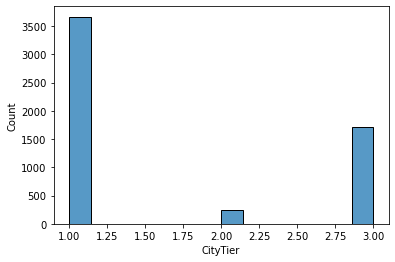

In [12]:
sns.histplot(data=numerical_df, x="CityTier")

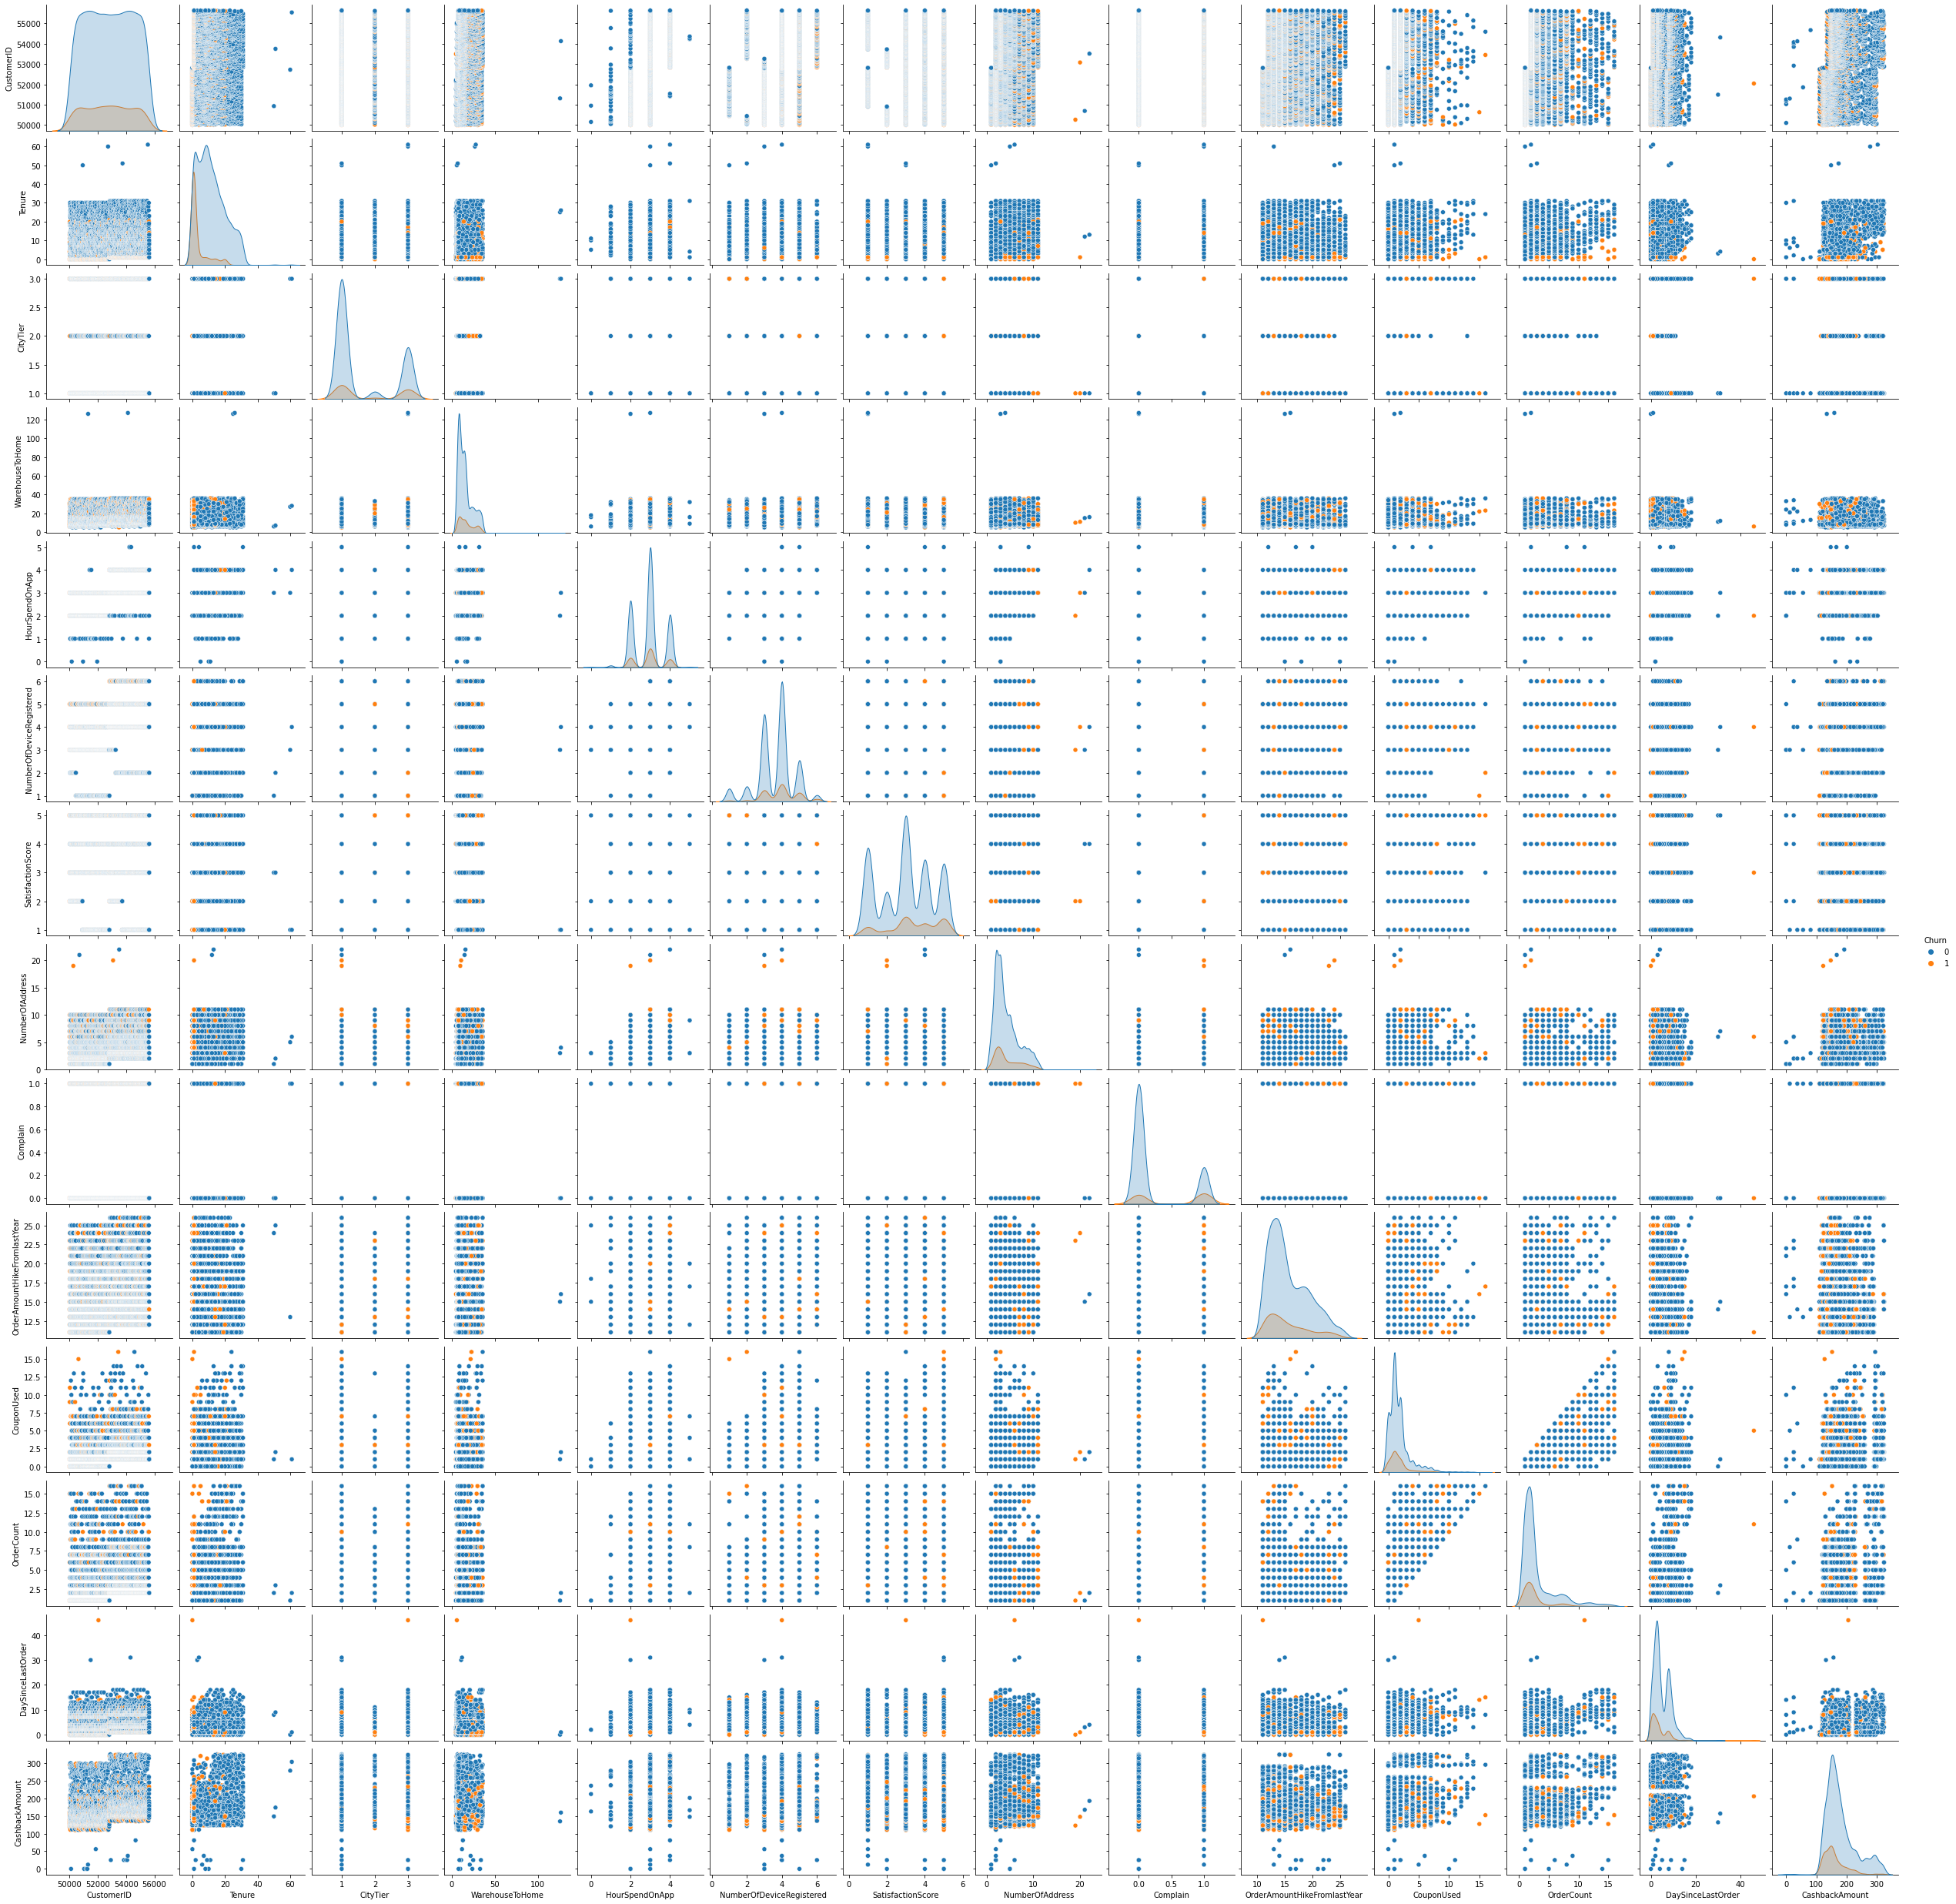

In [13]:
sns.pairplot(numerical_df,hue="Churn")

### 2. Non numeric columns

Cleaning (ignore)

In [14]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

#### Question: Show the unique values of each variable and print the number of occurences of each value
Describe these results briefly

In [15]:
for col in df.columns:
    if df[col].dtype == object:
      print(df[col].unique(), df[col].value_counts())

['Mobile Phone' 'Computer'] Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'] Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64
['Female' 'Male'] Male      3384
Female    2246
Name: Gender, dtype: int64
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
['Single' 'Divorced' 'Married'] Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


## Analysing the Churn by select variables
Provide business recommendation for each of the below

#### Question: Relation between complains and churn

In [16]:
df['Churn'].corr(df['Complain'])

0.25018825469703104

In [20]:
churn_rate_complain = df[df['Complain'] == 1]['Churn'].mean()
churn_rate_no_complain = df[df['Complain'] == 0]['Churn'].mean()

In [21]:
print("Churn rate for Complain =", churn_rate_complain)
print("Churn rate for No Complain =",churn_rate_no_complain)

Churn rate for Complain = 0.3167082294264339
Churn rate for No Complain = 0.1092896174863388


## Correlation matrix
Visualize the correlation between all variables

#### Question: Do we need to do any preprocessing on categorical variables before calculating correlation?

In [22]:
#Onc hot coding for categorical dataset
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
new_df = enc.fit_transform(categorical_df)
df_ohc = pd.DataFrame(new_df.toarray(), columns=enc.get_feature_names_out(), dtype=int)

In [23]:
df_ohc.head(5)

PreferredLoginDevice_Computer  PreferredLoginDevice_Mobile Phone  \
0                              0                                  1   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   PreferredLoginDevice_Phone  PreferredPaymentMode_CC  \
0                           0                        0   
1                           1                        0   
2                           1                        0   
3                           1                        0   
4                           1                        1   

   PreferredPaymentMode_COD  PreferredPaymentMode_Cash on Delivery  \
0                         0                                      0   
1                         0                                      0   
2                         0                                      0   
3                         0                                      0   
4                         0                                      0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                 0                                1   
1                                 0                                0   
2                                 0                                1   
3                                 0                                1   
4                                 0                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  ...  Gender_Male  \
0                              0                         0  ...            0   
1                              0                         1  ...            1   
2                              0                         0  ...            1   
3                              0                         0  ...            1   
4                              0                         0  ...            1   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                    1                        0   
1                                    0                        1   
2                                    0                        1   
3                                    1                        0   
4                                    0                        1   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       0                      0                     1  
2                       0                      0                     1  
3                       0                      0                     1  
4                       0                      0                     1  

[5 rows x 21 columns]

In [24]:
df_final = pd.concat([numerical_df, df_ohc], axis=1)
df_final.head(5)

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       50001      1     4.0         3              6.0             3.0   
1       50002      1     NaN         1              8.0             3.0   
2       50003      1     NaN         1             30.0             2.0   
3       50004      1     0.0         3             15.0             2.0   
4       50005      1     0.0         1             12.0             NaN   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   ...  Gender_Male  PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0  ...            0                         0                         0   
1  ...            1                         0                         0   
2  ...            1                         0                         0   
3  ...            1                         0                         0   
4  ...            1                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                    1                        0   
1                                    0                        1   
2                                    0                        1   
3                                    1                        0   
4                                    0                        1   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       0                      0                     1  
2                       0                      0                     1  
3                       0                      0                     1  
4                       0                      0                     1  

[5 rows x 36 columns]

In [25]:
df_final = df_final.dropna()
df_final.head(5)

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001      1     4.0         3              6.0             3.0   
3        50004      1     0.0         3             15.0             2.0   
5        50006      1     0.0         1             22.0             3.0   
11       50012      1    11.0         1              6.0             3.0   
12       50013      1     0.0         1             11.0             2.0   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2                9         1   
3                          4                  5                8         0   
5                          5                  5                2         1   
11                         4                  3               10         1   
12                         3                  3                2         1   

    ...  Gender_Male  PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0   ...            0                         0                         0   
3   ...            1                         0                         0   
5   ...            0                         0                         0   
11  ...            1                         1                         0   
12  ...            1                         0                         0   

    PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                     1                        0   
3                                     1                        0   
5                                     0                        0   
11                                    0                        0   
12                                    0                        1   

    PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                               0                        0   
3                               0                        0   
5                               1                        0   
11                              0                        0   
12                              0                        0   

    MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                        0                      0                     1  
3                        0                      0                     1  
5                        0                      0                     1  
11                       0                      0                     1  
12                       0                      0                     1  

[5 rows x 36 columns]

#### Question: Plot correlation matrix
Discuss a few significant correlations

In [26]:
#CustomerID column as it's not relevant for correlation
df_final = df_final.drop(columns=['CustomerID'])
df_final.head(5)

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       1     4.0         3              6.0             3.0   
3       1     0.0         3             15.0             2.0   
5       1     0.0         1             22.0             3.0   
11      1    11.0         1              6.0             3.0   
12      1     0.0         1             11.0             2.0   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2                9         1   
3                          4                  5                8         0   
5                          5                  5                2         1   
11                         4                  3               10         1   
12                         3                  3                2         1   

    OrderAmountHikeFromlastYear  ...  Gender_Male  PreferedOrderCat_Fashion  \
0                          11.0  ...            0                         0   
3                          23.0  ...            1                         0   
5                          22.0  ...            0                         0   
11                         13.0  ...            1                         1   
12                         13.0  ...            1                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
3                          0                                    1   
5                          0                                    0   
11                         0                                    0   
12                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
3                         0                              0   
5                         0                              1   
11                        0                              0   
12                        1                              0   

    PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                         0                       0                      0   
3                         0                       0                      0   
5                         0                       0                      0   
11                        0                       0                      0   
12                        0                       0                      0   

    MaritalStatus_Single  
0                      1  
3                      1  
5                      1  
11                     1  
12                     1  

[5 rows x 35 columns]

In [28]:
corr_matrix = df_final.corr()
corr_matrix

Churn    Tenure  CityTier  \
Churn                                  1.000000 -0.340013  0.073858   
Tenure                                -0.340013  1.000000 -0.057414   
CityTier                               0.073858 -0.057414  1.000000   
WarehouseToHome                        0.087318 -0.016353  0.004457   
HourSpendOnApp                         0.060845 -0.029818 -0.070035   
NumberOfDeviceRegistered               0.149041 -0.058752 -0.008616   
SatisfactionScore                      0.095759 -0.009972 -0.019494   
NumberOfAddress                        0.076336  0.196547 -0.046406   
Complain                               0.238137 -0.035228 -0.006122   
OrderAmountHikeFromlastYear            0.017193  0.012197 -0.027628   
CouponUsed                             0.010982  0.075959  0.013313   
OrderCount                            -0.001962  0.112339  0.035018   
DaySinceLastOrder                     -0.139254  0.118932  0.014304   
CashbackAmount                        -0.058756  0.213852  0.146569   
PreferredLoginDevice_Computer          0.040890 -0.010308 -0.000184   
PreferredLoginDevice_Mobile Phone     -0.079120  0.085754  0.098949   
PreferredLoginDevice_Phone             0.053023 -0.096773 -0.125199   
PreferredPaymentMode_CC                0.030729 -0.032474 -0.073109   
PreferredPaymentMode_COD               0.059430 -0.027497 -0.049111   
PreferredPaymentMode_Cash on Delivery -0.006498  0.069208 -0.004977   
PreferredPaymentMode_Credit Card      -0.029392 -0.024243 -0.150637   
PreferredPaymentMode_Debit Card       -0.039232  0.040958 -0.127528   
PreferredPaymentMode_E wallet          0.043972  0.016709  0.503165   
PreferredPaymentMode_UPI               0.000938 -0.043942 -0.036088   
Gender_Female                         -0.033792  0.052123  0.018072   
Gender_Male                            0.033792 -0.052123 -0.018072   
PreferedOrderCat_Fashion               0.013086  0.130259  0.083035   
PreferedOrderCat_Grocery              -0.017880  0.091251 -0.001750   
PreferedOrderCat_Laptop & Accessory   -0.184584  0.104482  0.245824   
PreferedOrderCat_Mobile                0.016675 -0.033466 -0.097493   
PreferedOrderCat_Mobile Phone          0.181683 -0.211477 -0.281079   
PreferedOrderCat_Others                0.010208  0.103702 -0.011248   
MaritalStatus_Divorced                -0.013023  0.015788  0.019181   
MaritalStatus_Married                 -0.159808  0.085990 -0.029876   
MaritalStatus_Single                   0.179481 -0.103150  0.017370   

                                       WarehouseToHome  HourSpendOnApp  \
Churn                                         0.087318        0.060845   
Tenure                                       -0.016353       -0.029818   
CityTier                                      0.004457       -0.070035   
WarehouseToHome                               1.000000        0.052731   
HourSpendOnApp                                0.052731        1.000000   
NumberOfDeviceRegistered                      0.024582        0.293021   
SatisfactionScore                             0.000434        0.039879   
NumberOfAddress                               0.003422        0.124962   
Complain                                      0.003829        0.020413   
OrderAmountHikeFromlastYear                   0.031975        0.096827   
CouponUsed                                   -0.014311        0.160239   
OrderCount                                    0.008800        0.092601   
DaySinceLastOrder                             0.010646        0.019526   
CashbackAmount                               -0.012433        0.131281   
PreferredLoginDevice_Computer                 0.022101       -0.004911   
PreferredLoginDevice_Mobile Phone            -0.002403        0.106765   
PreferredLoginDevice_Phone                   -0.022497       -0.129642   
PreferredPaymentMode_CC                       0.007388       -0.054905   
PreferredPaymentMode_COD                     -0.004197       -0.004520   
Prefe

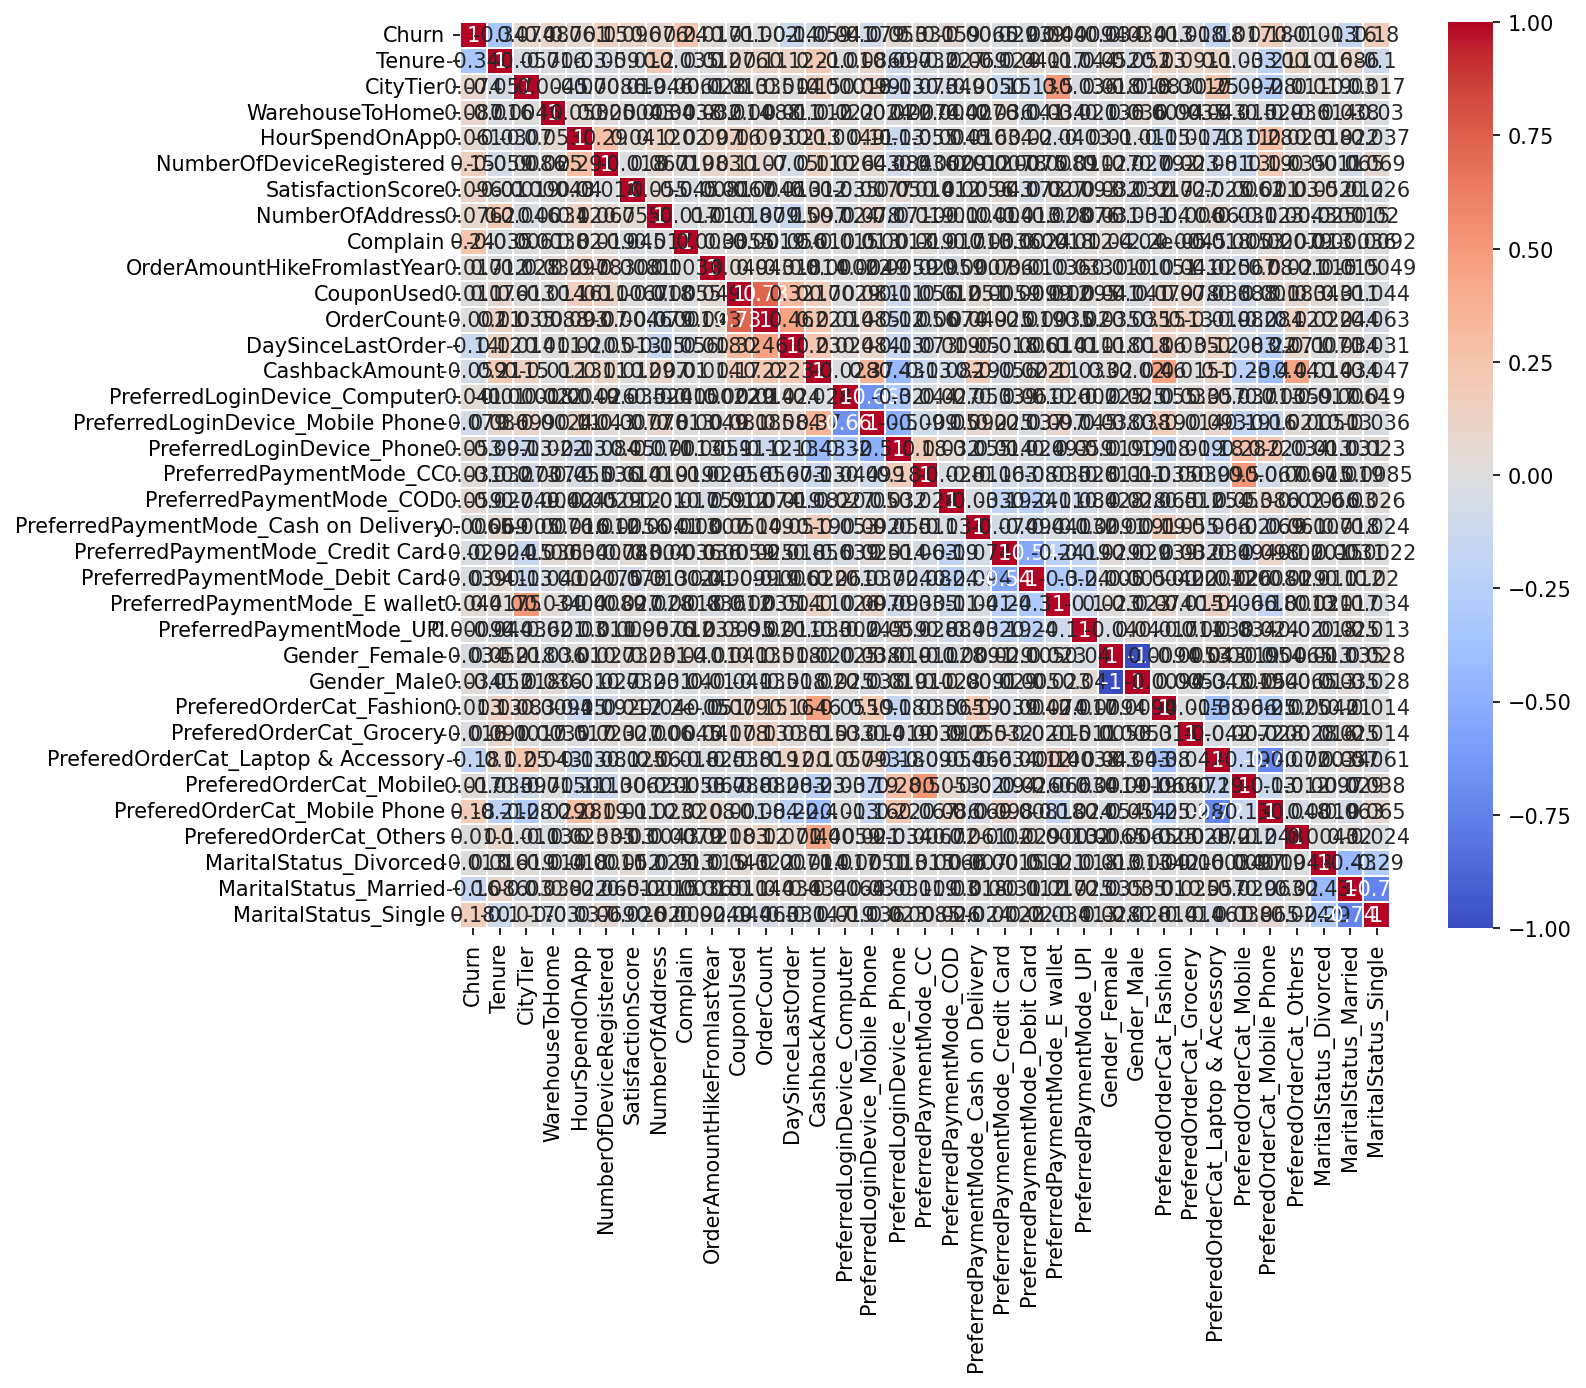

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8)
plt.show()

#### Optional: What is the correlation of each feature with target
Sort the correlation in descending order

In [35]:
corr_matrix.sort_values(by = 'Churn', ascending=False)

Churn    Tenure  CityTier  \
Churn                                  1.000000 -0.340013  0.073858   
Complain                               0.238137 -0.035228 -0.006122   
PreferedOrderCat_Mobile Phone          0.181683 -0.211477 -0.281079   
MaritalStatus_Single                   0.179481 -0.103150  0.017370   
NumberOfDeviceRegistered               0.149041 -0.058752 -0.008616   
SatisfactionScore                      0.095759 -0.009972 -0.019494   
WarehouseToHome                        0.087318 -0.016353  0.004457   
NumberOfAddress                        0.076336  0.196547 -0.046406   
CityTier                               0.073858 -0.057414  1.000000   
HourSpendOnApp                         0.060845 -0.029818 -0.070035   
PreferredPaymentMode_COD               0.059430 -0.027497 -0.049111   
PreferredLoginDevice_Phone             0.053023 -0.096773 -0.125199   
PreferredPaymentMode_E wallet          0.043972  0.016709  0.503165   
PreferredLoginDevice_Computer          0.040890 -0.010308 -0.000184   
Gender_Male                            0.033792 -0.052123 -0.018072   
PreferredPaymentMode_CC                0.030729 -0.032474 -0.073109   
OrderAmountHikeFromlastYear            0.017193  0.012197 -0.027628   
PreferedOrderCat_Mobile                0.016675 -0.033466 -0.097493   
PreferedOrderCat_Fashion               0.013086  0.130259  0.083035   
CouponUsed                             0.010982  0.075959  0.013313   
PreferedOrderCat_Others                0.010208  0.103702 -0.011248   
PreferredPaymentMode_UPI               0.000938 -0.043942 -0.036088   
OrderCount                            -0.001962  0.112339  0.035018   
PreferredPaymentMode_Cash on Delivery -0.006498  0.069208 -0.004977   
MaritalStatus_Divorced                -0.013023  0.015788  0.019181   
PreferedOrderCat_Grocery              -0.017880  0.091251 -0.001750   
PreferredPaymentMode_Credit Card      -0.029392 -0.024243 -0.150637   
Gender_Female                         -0.033792  0.052123  0.018072   
PreferredPaymentMode_Debit Card       -0.039232  0.040958 -0.127528   
CashbackAmount                        -0.058756  0.213852  0.146569   
PreferredLoginDevice_Mobile Phone     -0.079120  0.085754  0.098949   
DaySinceLastOrder                     -0.139254  0.118932  0.014304   
MaritalStatus_Married                 -0.159808  0.085990 -0.029876   
PreferedOrderCat_Laptop & Accessory   -0.184584  0.104482  0.245824   
Tenure                                -0.340013  1.000000 -0.057414   

                                       WarehouseToHome  HourSpendOnApp  \
Churn                                         0.087318        0.060845   
Complain                                      0.003829        0.020413   
PreferedOrderCat_Mobile Phone                -0.028939        0.281309   
MaritalStatus_Single                         -0.030496       -0.037134   
NumberOfDeviceRegistered                      0.024582        0.293021   
SatisfactionScore                             0.000434        0.039879   
WarehouseToHome                               1.000000        0.052731   
NumberOfAddress                               0.003422        0.124962   
CityTier                                      0.004457       -0.070035   
HourSpendOnApp                                0.052731        1.000000   
PreferredPaymentMode_COD                     -0.004197       -0.004520   
PreferredLoginDevice_Phone                   -0.022497       -0.129642   
PreferredPaymentMode_E wallet                 0.033578       -0.039522   
PreferredLoginDevice_Computer                 0.022101       -0.004911   
Gender_Male                                   0.035581       -0.009952   
PreferredPaymentMode_CC                       0.007388       -0.054905   
OrderAmountHikeFromlastYear                   0.031975        0.096827   
PreferedOrderCat_Mobile                      -0.015441       -0.112896   
PreferedOrderCat_Fashion                     -0.009435       -0.147830   
Coupo

# 3. Modelling

## Prepare data
Fill nulls in each column

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [37]:
for col in df.columns:
    nullCount = df[col].isnull().sum()
    if nullCount > 0:
        df[col]=imputer.fit_transform(df[[col]])
        print("Filled", nullCount, "nulls in", col)

Filled 264 nulls in Tenure
Filled 251 nulls in WarehouseToHome
Filled 255 nulls in HourSpendOnApp
Filled 265 nulls in OrderAmountHikeFromlastYear
Filled 256 nulls in CouponUsed
Filled 258 nulls in OrderCount
Filled 307 nulls in DaySinceLastOrder


#### Question: Make the data suitable for model training

In [39]:
df_final.head(5)

Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0       1     4.0         3              6.0             3.0   
3       1     0.0         3             15.0             2.0   
5       1     0.0         1             22.0             3.0   
11      1    11.0         1              6.0             3.0   
12      1     0.0         1             11.0             2.0   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3                  2                9         1   
3                          4                  5                8         0   
5                          5                  5                2         1   
11                         4                  3               10         1   
12                         3                  3                2         1   

    OrderAmountHikeFromlastYear  ...  Gender_Male  PreferedOrderCat_Fashion  \
0                          11.0  ...            0                         0   
3                          23.0  ...            1                         0   
5                          22.0  ...            0                         0   
11                         13.0  ...            1                         1   
12                         13.0  ...            1                         0   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                          0                                    1   
3                          0                                    1   
5                          0                                    0   
11                         0                                    0   
12                         0                                    0   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                         0                              0   
3                         0                              0   
5                         0                              1   
11                        0                              0   
12                        1                              0   

    PreferedOrderCat_Others  MaritalStatus_Divorced  MaritalStatus_Married  \
0                         0                       0                      0   
3                         0                       0                      0   
5                         0                       0                      0   
11                        0                       0                      0   
12                        0                       0                      0   

    MaritalStatus_Single  
0                      1  
3                      1  
5                      1  
11                     1  
12                     1  

[5 rows x 35 columns]

In [40]:
from sklearn.linear_model import LogisticRegression
x = df_final.drop(['Churn'],axis = 1)
x.head(5)
y = df_final['Churn']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
#check the shape of X_train and X_test
x_train.shape, x_test.shape

((3019, 34), (755, 34))

In [49]:
clf = LogisticRegression(random_state=0).fit(x_train,y_train)

/Users/jacquie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
clf.fit(x_train, y_train)

/Users/jacquie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [52]:
#predict result
y_pred = clf.predict(x_test)

## Model training

#### Question: Train one or more models and show their performance on training and test data

Train and show train & test accuracy

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
train_accuracy = accuracy_score(y_pred, y_test)*100
train_accuracy

89.27152317880794

In [56]:
y_pred_train = clf.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 0, 1, 0])

In [57]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8917


# 4. Evaluation
Feel free to use any libraries / stackoverflow

#### Question: Show the precision, recall and f1 score for the model with best accuracy


In [59]:
print(classification_report(y_pred, y_test, digits=6))

              precision    recall  f1-score   support

           0   0.958333  0.920000  0.938776       675
           1   0.495327  0.662500  0.566845        80

    accuracy                       0.892715       755
   macro avg   0.726830  0.791250  0.752810       755
weighted avg   0.909273  0.892715  0.899366       755



print(classification_report(y_train, y_pred_train, digits=6))

## Confusion matrix

#### Question: Show the confusion matrix
Describe the performance of model and steps you could take to improve it

#### Bonus: Plot the confusion matrix

In [61]:
print('Confusion matrix:\n', confusion_matrix(y_pred, y_test))

Confusion matrix:
 [[621  54]
 [ 27  53]]


In [62]:
print('Confusion matrix:\n', confusion_matrix(y_pred_train, y_train))

Confusion matrix:
 [[2404  236]
 [  91  288]]


# Discussion

In [64]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))

Training set score: 0.8917


In [65]:
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Test set score: 0.8927


The training-set accuracy score is 0.8917 while the test-set accuracy to be 0.8927. These two values are quite comparable. So, there is no question of overfitting.

Next Step, we could perform hyperparameter optimization using gridsearch CV to improve the performance for this particular model